# Determine time lag between ICOS stations and ERA5

In [9]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import numpy as np
import glob
import metview as mv
import xarray as xr
import pytz
import datetime
import timezonefinder
from timezonefinder import TimezoneFinder
execfile("utils.py")
%matplotlib inline

In [1]:
colorpal=["midnightblue","navy","mediumblue","greenyellow","yellow"
         "gold","orange","red","darkorchid","darkviolet","blueviolet","indigo"]

In [3]:
#obs data
dir_obs="/home/lauracma/Documents/ecmwf_proj/data/ISMN_data/in_situ_data/pre_processed_data/ICOS_FLUXNET/2020/"

dir="/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_ea/2020/"
files=np.sort(glob.glob(dir+"/*"))
files

array(['/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_ea/2020/fluxes_0001_202001',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_ea/2020/fluxes_0001_202002',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_ea/2020/fluxes_0001_202003',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_ea/2020/fluxes_0001_202004',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_ea/2020/fluxes_0001_202005',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_ea/2020/fluxes_0001_202006',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_ea/2020/fluxes_0001_202007',
       '/home/lauracma/Documents/ecmwf_proj/data/model_fluxes/analysis_data/raw_data/0001_ea/2020/fluxes_0001_202008',
       '/home/lauracma/Documents/ecmwf_proj/data

In [4]:
#meta data ICOS stations 2020
meta=np.loadtxt("/home/lauracma/Documents/ecmwf_proj/data/ISMN_data/in_situ_data/pre_processed_data/station_info/ICOS_FLUXNET/station_coords_2020",str, comments="%", skiprows=1)
nstations=np.shape(meta)[0]
meta

array([['BE-Bra', '51.30761', '4.51984', '16', 'Cfb', '3'],
       ['BE-Vie', '50.304962', '5.998099', '490', 'Cfb', '18'],
       ['DE-Tha', '50.96256', '13.56515', '380', 'Cfb', '3'],
       ['DK-Sor', '55.48587', '11.644645', '40', 'Cfb', '5'],
       ['FI-Hyy', '61.84741', '24.29477', '181', 'Dfc', '3'],
       ['CH-Dav', '46.81533', '9.85591', '1689', 'Dfc', '3'],
       ['RU-Fyo', '56.461528', '32.922083', '274', 'Dfc', '3'],
       ['IT-Ren', '46.58686', '11.43369', '1735', 'Dfc', '3'],
       ['DE-Hai', '51.079407', '10.452089', '438', 'Dfb', '6'],
       ['IL-Yat', '31.345045', '35.051989', '657', 'Dfb', '6'],
       ['DE-Geb', '51.09973', '10.91463', '161', 'Cfb', '1'],
       ['SE-Deg', '64.18203', '19.55654', '270', 'Dfc', '13'],
       ['IT-Lav', '45.9562', '11.28132', '1355', 'Dfc', '3'],
       ['BE-Lon', '50.55162', '4.746234', '170', 'Cfb', '1'],
       ['CH-Lae', '47.47808', '8.365', '689', 'Dfc', '3'],
       ['CH-Oe2', '47.28631', '7.73433', '452', 'Dfb', '1'],
    

# Determine Time Lag

### Check ICOS time

In [5]:
#selected stations covering east-west range
i1=70
f=glob.glob(dir_obs+"/ICOS_FLUXNET_"+str(round(float(meta[i1,1]),4))+"*"+str(round(float(meta[i1,2]),4))+"*")
dat=pd.read_pickle(f[0])
sh_obs_ie=dat["H_CORR"]
lh_obs_ie=dat["LE_CORR"]

i2=45
f=glob.glob(dir_obs+"/ICOS_FLUXNET_"+str(round(float(meta[i2,1]),4))+"*"+str(round(float(meta[i2,2]),4))+"*")
dat=pd.read_pickle(f[0])
sh_obs_cz=dat["H_CORR"]
lh_obs_cz=dat["LE_CORR"]

i3=60
f=glob.glob(dir_obs+"/ICOS_FLUXNET_"+str(round(float(meta[i3,1]),4))+"*"+str(round(float(meta[i3,2]),4))+"*")
dat=pd.read_pickle(f[0])
sh_obs_fi=dat["H_CORR"]
lh_obs_fi=dat["LE_CORR"]

i4=55
f=glob.glob(dir_obs+"/ICOS_FLUXNET_"+str(round(float(meta[i4,1]),4))+"*"+str(round(float(meta[i4,2]),4))+"*")
dat=pd.read_pickle(f[0])
sh_obs_es=dat["H_CORR"]
lh_obs_es=dat["LE_CORR"]

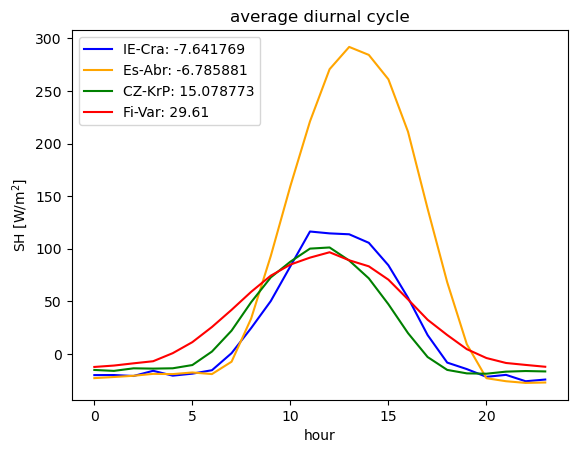

In [10]:
#mean diurnal cycle SH
plt.plot(mean_diurnal_cycle(sh_obs_ie[::2]),label="IE-Cra: "+str(meta[i1,2]),color="blue")
plt.plot(mean_diurnal_cycle(sh_obs_es[::2]),label="Es-Abr: " +str(meta[i4,2]),color="orange")
plt.plot(mean_diurnal_cycle(sh_obs_cz[::2]),label="CZ-KrP: "+str(meta[i2,2]),color="green")
plt.plot(mean_diurnal_cycle(sh_obs_fi[::2]),label="Fi-Var: "+str(meta[i3,2]),color="red")
plt.ylabel(r"SH [W/m$^2$]")
plt.xlabel("hour")
plt.title("average diurnal cycle")
plt.legend()

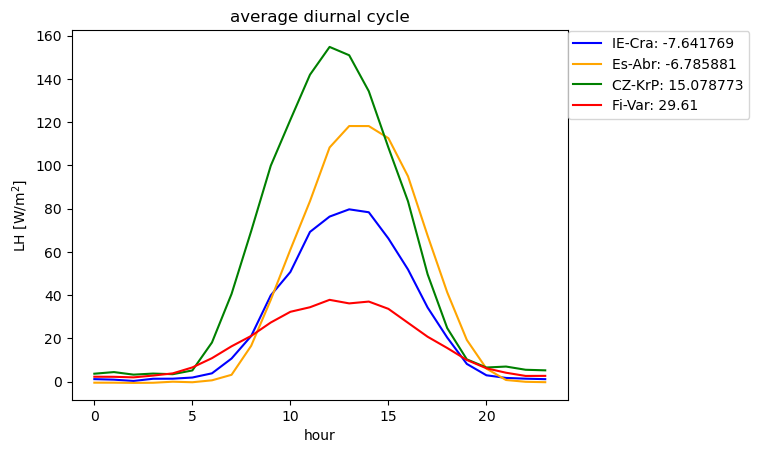

In [11]:
#mean diurnal cycle LH
plt.plot(mean_diurnal_cycle(lh_obs_ie[::2]),label="IE-Cra: "+str(meta[70,2]),color="blue")
plt.plot(mean_diurnal_cycle(lh_obs_es[::2]),label="Es-Abr: " +str(meta[55,2]),color="orange")
plt.plot(mean_diurnal_cycle(lh_obs_cz[::2]),label="CZ-KrP: "+str(meta[45,2]),color="green")
plt.plot(mean_diurnal_cycle(lh_obs_fi[::2]),label="Fi-Var: "+str(meta[60,2]),color="red")
plt.ylabel(r"LH [W/m$^2$]")
plt.xlabel("hour")
plt.title("average diurnal cycle")
plt.legend(loc=(1,0.76))

### Time Lag ICOS vs ERA5

In [12]:
monlen=[31,29,31,30,31,30,31,31,30,31,30,31]
i=7 #selected month (index)

In [13]:
#prepare obs data
i1=70
f=glob.glob(dir_obs+"/ICOS_FLUXNET_"+str(round(float(meta[i1,1]),4))+"*"+str(round(float(meta[i1,2]),4))+"*")
dat=pd.read_pickle(f[0])
sh_obs_ie=dat["H_CORR"][sum(monlen[:i-1])*48:sum(monlen[:i])*48]
lh_obs_ie=dat["LE_CORR"][sum(monlen[:i-1])*48:sum(monlen[:i])*48]

i2=45
f=glob.glob(dir_obs+"/ICOS_FLUXNET_"+str(round(float(meta[i2,1]),4))+"*"+str(round(float(meta[i2,2]),4))+"*")
dat=pd.read_pickle(f[0])
sh_obs_cz=dat["H_CORR"][sum(monlen[:i-1])*48:sum(monlen[:i])*48]
lh_obs_cz=dat["LE_CORR"][sum(monlen[:i-1])*48:sum(monlen[:i])*48]

i3=60
f=glob.glob(dir_obs+"/ICOS_FLUXNET_"+str(round(float(meta[i3,1]),4))+"*"+str(round(float(meta[i3,2]),4))+"*")
dat=pd.read_pickle(f[0])
sh_obs_fi=dat["H_CORR"][sum(monlen[:i-1])*48:sum(monlen[:i])*48]
lh_obs_fi=dat["LE_CORR"][sum(monlen[:i-1])*48:sum(monlen[:i])*48]

i4=55
f=glob.glob(dir_obs+"/ICOS_FLUXNET_"+str(round(float(meta[i4,1]),4))+"*"+str(round(float(meta[i4,2]),4))+"*")
dat=pd.read_pickle(f[0])
sh_obs_es=dat["H_CORR"][sum(monlen[:i-1])*48:sum(monlen[:i])*48]
lh_obs_es=dat["LE_CORR"][sum(monlen[:i-1])*48:sum(monlen[:i])*48]

In [14]:
#prepare model data (whole field)
sh=mv.Fieldset()
lh=mv.Fieldset()
tmp=mv.read(files[i]) #read model, selected month
sh_tmp=tmp["sshf"]
lh_tmp=tmp["slhf"]
sh.append(sh_tmp[:monlen[i]*26]) #26 because of the deacc values
lh.append(lh_tmp[:monlen[i]*26])

In [15]:
times = mv.valid_date(sh)
off1=times[0].hour #offset due to storage of model data

sh.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,sshf,surface,0,20200801,600,0,fc,reduced_gg
1,ecmf,sshf,surface,0,20200801,600,0-1,fc,reduced_gg
2,ecmf,sshf,surface,0,20200801,600,1-2,fc,reduced_gg
3,ecmf,sshf,surface,0,20200801,600,2-3,fc,reduced_gg
4,ecmf,sshf,surface,0,20200801,600,3-4,fc,reduced_gg
...,...,...,...,...,...,...,...,...,...
801,ecmf,sshf,surface,0,20200831,1800,7-8,fc,reduced_gg
802,ecmf,sshf,surface,0,20200831,1800,8-9,fc,reduced_gg
803,ecmf,sshf,surface,0,20200831,1800,9-10,fc,reduced_gg


In [16]:
#modelled fluxes at closest model grid point
coords=[float(meta[i1,1]),float(meta[i1,2])]
sh_mod_ie=np.array(sh.nearest_gridpoint(coords))/3600*-1
lh_mod_ie=np.array(lh.nearest_gridpoint(coords))/3600*-1
sh_mod_ie=sh_mod_ie[sh_mod_ie!=0]
lh_mod_ie=lh_mod_ie[lh_mod_ie!=0]
coords=[float(meta[i2,1]),float(meta[i2,2])]
sh_mod_cz=np.array(sh.nearest_gridpoint(coords))/3600*-1
lh_mod_cz=np.array(lh.nearest_gridpoint(coords))/3600*-1
sh_mod_cz=sh_mod_cz[sh_mod_cz!=0]
lh_mod_cz=lh_mod_cz[lh_mod_cz!=0]
coords=[float(meta[i3,1]),float(meta[i3,2])]
sh_mod_fi=np.array(sh.nearest_gridpoint(coords))/3600*-1
lh_mod_fi=np.array(lh.nearest_gridpoint(coords))/3600*-1
sh_mod_fi=sh_mod_fi[sh_mod_fi!=0]
lh_mod_fi=lh_mod_fi[lh_mod_fi!=0]
coords=[float(meta[i4,1]),float(meta[i4,2])]
sh_mod_es=np.array(sh.nearest_gridpoint(coords))/3600*-1
lh_mod_es=np.array(lh.nearest_gridpoint(coords))/3600*-1
sh_mod_es=sh_mod_es[sh_mod_es!=0]
lh_mod_es=lh_mod_es[lh_mod_es!=0]

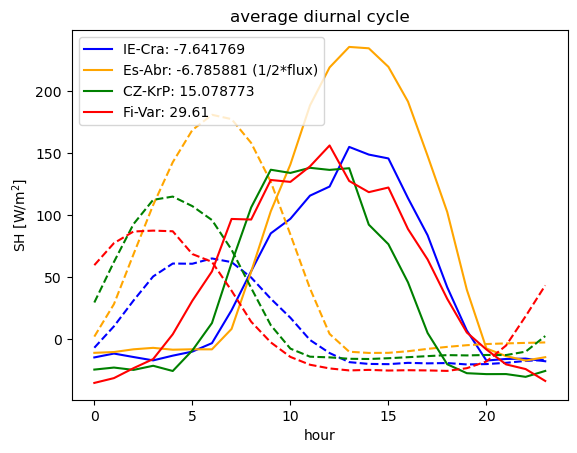

In [17]:
#without any shift
plt.plot(mean_diurnal_cycle(sh_obs_ie[::2]),label="IE-Cra: "+str(meta[i1,2]),color="blue")
plt.plot(mean_diurnal_cycle(sh_mod_ie),color="blue",linestyle="dashed")

plt.plot(mean_diurnal_cycle(sh_obs_es[::2])/2,label="Es-Abr: " +str(meta[i4,2]) +" (1/2*flux)",color="orange")
plt.plot(mean_diurnal_cycle(sh_mod_es)/2,color="orange",linestyle="dashed")

plt.plot(mean_diurnal_cycle(sh_obs_cz[::2]),label="CZ-KrP: "+str(meta[i2,2]),color="green")
plt.plot(mean_diurnal_cycle(sh_mod_cz),color="green",linestyle="dashed")

plt.plot(mean_diurnal_cycle(sh_obs_fi[::2]),label="Fi-Var: "+str(meta[i3,2]),color="red")
plt.plot(mean_diurnal_cycle(sh_mod_fi),color="red",linestyle="dashed")

plt.ylabel(r"SH [W/m$^2$]")

plt.xlabel("hour")
plt.title("average diurnal cycle")
plt.legend()

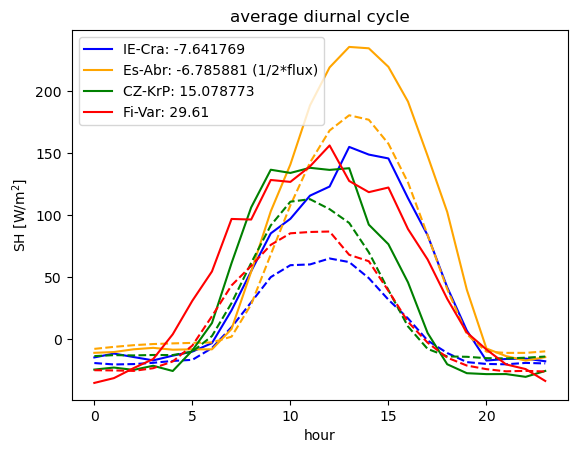

In [18]:
off=24-off1+1

timestring="2020-08-01 00:00:00"
coords=[float(meta[i1,1]),float(meta[i1,2])]
offs=int(off-utc_offset(coords[0],coords[1],timestring)) #location dependent offset
plt.plot(mean_diurnal_cycle(sh_obs_ie[::2]),label="IE-Cra: "+str(meta[70,2]),color="blue")
plt.plot(mean_diurnal_cycle(sh_mod_ie[offs:]),color="blue",linestyle="dashed")

coords=[float(meta[i4,1]),float(meta[i4,2])]
offs=int(off-utc_offset(coords[0],coords[1],timestring)) #location dependent offset
plt.plot(mean_diurnal_cycle(sh_obs_es[::2])/2,label="Es-Abr: " +str(meta[i4,2]) +" (1/2*flux)",color="orange")
plt.plot(mean_diurnal_cycle(sh_mod_es[offs:])/2,color="orange",linestyle="dashed")

coords=[float(meta[i2,1]),float(meta[i2,2])]
offs=int(off-utc_offset(coords[0],coords[1],timestring)) #location dependent offset
plt.plot(mean_diurnal_cycle(sh_obs_cz[::2]),label="CZ-KrP: "+str(meta[i2,2]),color="green")
plt.plot(mean_diurnal_cycle(sh_mod_cz[offs:]),color="green",linestyle="dashed")

coords=[float(meta[i3,1]),float(meta[i3,2])]
offs=int(off-utc_offset(coords[0],coords[1],timestring)) #location dependent offset
plt.plot(mean_diurnal_cycle(sh_obs_fi[::2]),label="Fi-Var: "+str(meta[i3,2]),color="red")
plt.plot(mean_diurnal_cycle(sh_mod_fi[offs:]),color="red",linestyle="dashed")

plt.ylabel(r"SH [W/m$^2$]")

plt.xlabel("hour")
plt.title("average diurnal cycle")
plt.legend()

### whole year

Text(0.5, 1.0, 'average diurnal cycle')

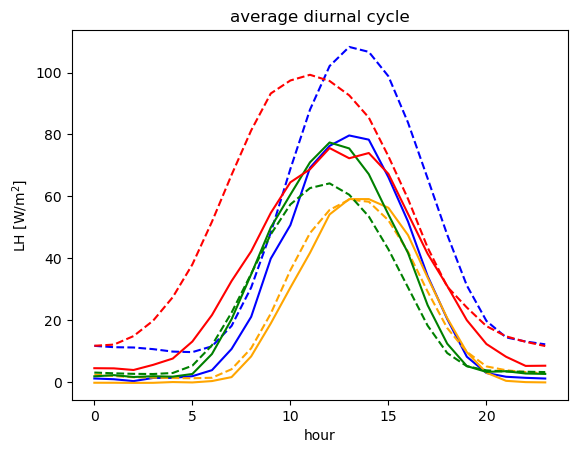

In [122]:
off=17 #fixed shift
plt.plot(mean_diurnal_cycle(lh_obs_ie[::2]),label="IE-Cra: "+str(meta[70,2]),color="blue")
plt.plot(mean_diurnal_cycle(lh_mod_ie[off:]),label="IE-Cra: "+str(meta[70,2]),color="blue",linestyle="dashed")

plt.plot(mean_diurnal_cycle(lh_obs_es[::2]/2),label="Es-Abr: " +str(meta[55,2]) +" (1/2*flux)",color="orange")
plt.plot(mean_diurnal_cycle(lh_mod_es[off:]/2),label="Es-Abr: " +str(meta[55,2]) +" (1/2*flux)",color="orange",linestyle="dashed")

plt.plot(mean_diurnal_cycle(lh_obs_cz[::2])/2,label="CZ-KrP: "+str(meta[45,2]),color="green")
plt.plot(mean_diurnal_cycle(lh_mod_cz[off:]/2),label="CZ-KrP: "+str(meta[45,2]),color="green",linestyle="dashed")

plt.plot(mean_diurnal_cycle(lh_obs_fi[::2]*2),label="Fi-Var: "+str(meta[60,2]),color="red")
plt.plot(mean_diurnal_cycle(lh_mod_fi[off:]*2),label="Fi-Var: "+str(meta[60,2]),color="red",linestyle="dashed")

plt.ylabel(r"LH [W/m$^2$]")

plt.xlabel("hour")
plt.title("average diurnal cycle")
#plt.legend()